## Outline


*   Downloading dataset (CIFAR10)
*   Dataloader in torch.utils
*   Visualising images
*   Single and multiple convolutional layers
*   LeNet
*   Training LeNet
*   Training on GPU
*   Simple visualisation
*   Exercises



In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data loading

In [5]:
import torchvision
import torchvision.transforms as transforms
# to apply functions when downloading only, similar to "map" (here, converts each image "ToTensor" while downloading so that can use PyTorch tensors on them)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download = True, transform = transforms.ToTensor())
# train with this data, download locally (not remotely work with it)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
# Dataset has labels in terms of indices
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

In [13]:
dataiter = iter(trainloader)

# Running each time accesses the next batch
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item()) # Can access till labels[3] only since batch_size = 4

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


# Visualise data

In [14]:
# Access first image
img = images[0] # 3,32,32
print(type(img))

<class 'torch.Tensor'>


In [15]:
# Better to plot uing NumPy
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [16]:
# Just shifting axes such that order is (x,y,z)
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(32, 32, 3)


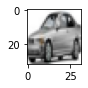

In [17]:
plt.figure(figsize = (1,1))
plt.imshow(npimg) # To plot images in Matplotlib
plt.show()

Remember the label of images[0] was = 1 (car)!

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

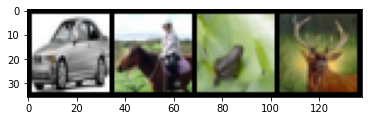

car horse frog deer


In [19]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))